# Preprocessing Goals
## Molecular property calculation
- standardized smiles for each ingredient
- mw
- logp
- hydrogen donors/acceptors
- topological polar suface area
- visualizations!

In [80]:
from rdkit import Chem
from rdkit.Chem import PandasTools
import pandas as pd
from py2opsin import py2opsin
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

In [85]:
# pre process amika perk up dry shampoo
df = pd.read_csv("data/raw/amika_perk_up_dry_shampoo.csv")
df.columns = ["IUPAC_NAME", "GIVEN_NAME"]
df

,IUPAC_NAME,GIVEN_NAME
0,Propane,Propane
1,Phenoxyethanol,Alcohol Denat. (Sd Alcohol 40-B)
2,"5-[5-[3,4-dihydroxy-6-(hydroxymethyl)-5-methox...",Oryza Sativa (Rice/Riz) Starch
3,1-methyl-4-(1-methylethenyl)-cyclohexene,Fragrance/Parfum
4,Hydroxyisohexyl 3-Cyclohexene Carboxaldehyde,Disteardimonium Hectorite
5,Hydroxycitronellal,Cyclopentasiloxane
6,Water,Water/Eau/Aqua
7,"1,3,5,7-Tetrahydroxy-2,4,6,8,9,10-hexaoxa-1,3,...",Hippophae Rhamnoides (Sea Buckthorn/Argousier)...
8,Cyclopentasiloxane,Phenoxyethanol
9,"(3S)-3,7-dimethyloct-6-en-1-ol",Butylphenyl Methylpropional


In [87]:

def name_to_smiles(name):
    smiles = py2opsin(str(name))
    if smiles:
        return smiles
    else: 
        return None

df['SMILES'] = df['IUPAC_NAME'].apply(lambda x: name_to_smiles(x))
df

,IUPAC_NAME,GIVEN_NAME,SMILES
0,Propane,Propane,CCC
1,Phenoxyethanol,Alcohol Denat. (Sd Alcohol 40-B),O(C1=CC=CC=C1)C(C)O
2,"5-[5-[3,4-dihydroxy-6-(hydroxymethyl)-5-methox...",Oryza Sativa (Rice/Riz) Starch,OC1C(OC(C(C1O)OC)CO)OC1C(C(C(OC1COC1OC(C(C(C1O...
3,1-methyl-4-(1-methylethenyl)-cyclohexene,Fragrance/Parfum,CC1=CCC(CC1)C(=C)C
4,Hydroxyisohexyl 3-Cyclohexene Carboxaldehyde,Disteardimonium Hectorite,OC1C(CCC=C1)(C=O)CCCC(C)C
5,Hydroxycitronellal,Cyclopentasiloxane,CC(CCCC(C)(C)O)CC=O
6,Water,Water/Eau/Aqua,O
7,"1,3,5,7-Tetrahydroxy-2,4,6,8,9,10-hexaoxa-1,3,...",Hippophae Rhamnoides (Sea Buckthorn/Argousier)...,O[Si]12O[Si]3(O[Si](O[Si](O1)(O2)O)(O3)O)O
8,Cyclopentasiloxane,Phenoxyethanol,O1[SiH2]O[SiH2]O[SiH2]O[SiH2]O[SiH2]1
9,"(3S)-3,7-dimethyloct-6-en-1-ol",Butylphenyl Methylpropional,C[C@H](CCO)CCC=C(C)C


In [89]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
from functools import partial

def calculate_descriptor(smiles, descriptor_func):
    if pd.isna(smiles):
        return None
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    return descriptor_func(mol)

mol_weight = partial(calculate_descriptor, descriptor_func=Descriptors.MolWt)
h_acceptor = partial(calculate_descriptor, descriptor_func=Descriptors.NumHAcceptors)
h_donor = partial(calculate_descriptor, descriptor_func=Lipinski.NumHDonors)
tpsa = partial(calculate_descriptor, descriptor_func=Chem.rdMolDescriptors.CalcTPSA)

descriptors = {
    'MW': mol_weight,
    'H_ACCEPTOR': h_acceptor,
    'H_DONOR': h_donor,
    'TPSA': tpsa
}

for col, func in descriptors.items():
    df[col] = df['SMILES'].apply(func)

df
df.to_csv("data/amika_perk_up_dry_shampoo.csv")


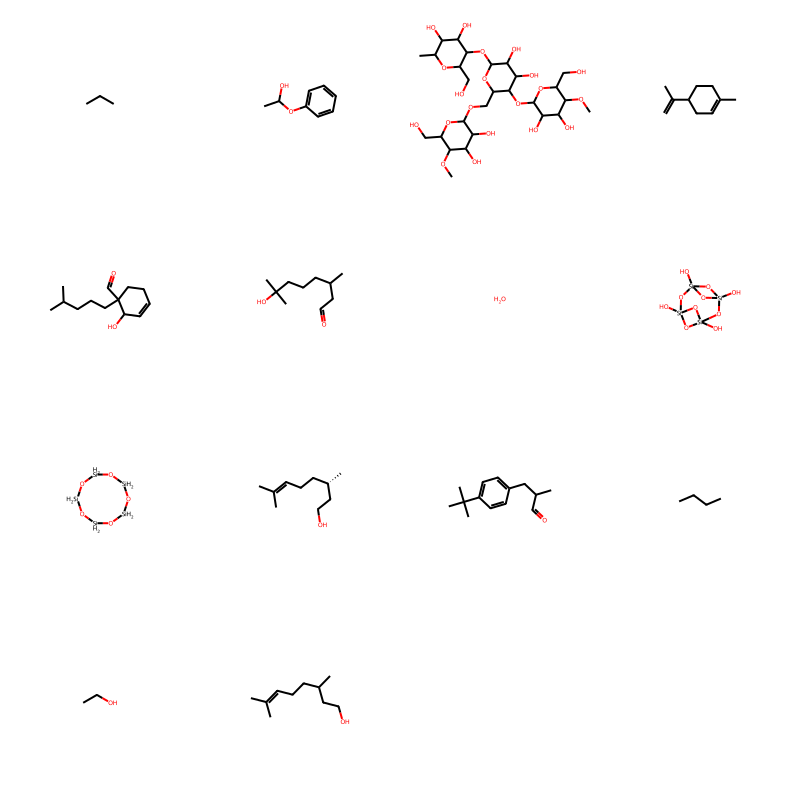

In [84]:
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='SMILES', molCol='ROMol')

Draw.MolsToGridImage(df.ROMol,molsPerRow=4)

## Similarity Analysis 
- Generate molecular fingerprints (e.g., Morgan fingerprints) for ingredients
- Calculate Tanimoto similarity between products based on their ingredient fingerprints


## Substructure Searching 
- Identify common functional groups or substructures across products
- Compare presence/absence of specific moieties (e.g., silicones, sulfates)


## Clustering
- Perform hierarchical clustering of products based on ingredient similarity
- Visualize clusters to identify groups of similar products


## Principle Component Analysis
- Reduce dimensionality of molecular descriptors
- Plot products in 2D or 3D space to visualize relationships


## Functional Group Analysis
- Count occurrences of specific functional groups (e.g., alcohols, esters)
- Compare distribution of functional groups across products